# Plotting Multiple Spectra

This is an example of generating one plot with multiple spectra

`lrspectrum` must be installed (or a symbolic link to `../lrspectrum`
must be included in the calling directory)

In [1]:
import os
import re

from lrspectrum import LRSpectrum

Multiple instances of `LRSpectrum` can be created with different logfiles

In [2]:
lr0 = LRSpectrum('example_ammonia.log', name='ammonia')
lr1 = LRSpectrum('example_formaldehyde.log', name='formaldehyde')
lr2 = LRSpectrum('example_methane.log', name='methane')

Generating the spectra is the same as before

In [3]:
lr0.gen_spect()
lr1.gen_spect()
lr2.gen_spect()

Spectral range not specified... Automatically generating spectral range
Spectral range not specified... Automatically generating spectral range
Spectral range not specified... Automatically generating spectral range


Turn off roots with sticks=False

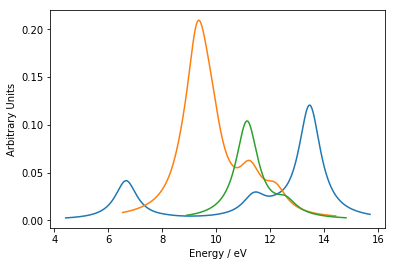

In [4]:
lr0.plot(sticks=False)
lr1.plot(sticks=False)
lr2.plot(sticks=False, show=True)

While the above works alright for small sets of logfiles, a better method can
iterate through a list of LRSpectrum to minimize repeated code.

In [5]:
lrlst = []
rexp = re.compile('example_[^\W\d_]+.log')
for fil in os.listdir('.'):
    if rexp.match(fil) is not None:
        name = fil.split('.')[0].split('_')[1]
        lrlst.append(LRSpectrum(fil, name=name))

Note that the default gen_spect options aren't always good. The code attempts to automatically generate a range of frequencies. It is often easier and produces better results simply to give a custom, well defined `wlim`

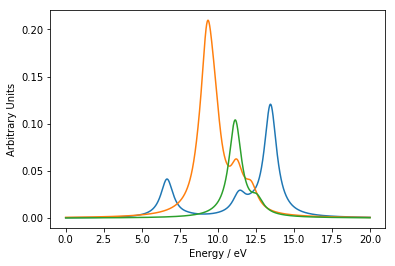

In [6]:
wlim = (0, 20)
for lr in lrlst:
    lr.gen_spect(wlim=wlim)
    last = lr == lrlst[-1]
    lr.plot(sticks=False, show=last)